# An Analysis of Paleo to present Climate Change Data

<details>

<summary> Student Details </summary>

| Student| Details |
| -------- | -------- |
| Course: | KDATG_L08_Y1 |
| Author: | Rebecca Hannah Quinn |
| Student Number: | G00425671 |

</details>

---

## Project Goals

To Analyse CO2 vs Temperature Anomaly for the past 800,000 years to the present day.
To examine the change in the polar-ice coverage alongside this.
To examine the changes in Ireland and Irish climate change signals.

In gathering this information and data I will fuse and analyse the data using pandas dataframes and export the results to csv and json formats.

I will be anaylising the data, the trends, the relationships between them including but not limited to: temporal leads, lags, and frequencies. I will also use synthesised data to predict global temperature anomoly over the next few decades and compare to published models of the same to see if atmospherice CO2 trends continue and comment on the accelerated warming based on the latest features with temperatures polar-ice coverage and ocean and sea levels.




<details>

<summary> Table of Contents </summary>

[INTRODUCTION](#01)

[PRE-PROCESSING](#02)

[ANALYSIS](#03)

[PREDICITONS](#04)

[FURTHER COMMENT](#05)

[PLOTS](#06)

</details>

---


## Introduction


There have been studies on the Earth"s climate that have resulted in data as far back as 800,000 years by extracting core samples from deep beneath the ice sheets of Greenland and Antarctica. These samples contain detailed information on air temperature and CO2 levels that are trapped within them. Current polar records demonstrate a close association between atmospheric carbon dioxide and temperature in the natural world. In essence, when one increases, the other one follows.

However, there is still some uncertainty about which occurred first - a spike in temperature or CO2. Until now, the most extensive records to date on a significant change in Earth"s climate came from the EPICA Dome C ice core on the Antarctic Plateau. The data, which covered the end of the last ice age, between 20,000 and 10,000 years ago, indicated that CO2 levels could have lagged behind rising global temperatures by as much as 1,400 years.
[1]: https://www.scientificamerican.com/article/ice-core-data-help-solve/#:~:text=Scientists%20use%20air%20trapped%20in,than%20the%20ice%20surrounding%20them.


<a id="01i">

## Pre-processing

</a>





## Import Packages

In [104]:
#importing packages required for analysis and visualization
import requests
from io import StringIO
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the Data

### CO2

#### CO2 Data 1

In [105]:
epica1col = ["year", "co2", "sigma"]
epica8kyr1 = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite", skiprows=59, names=epica1col)
epica8kyr1["year"] = epica8kyr1["year"].astype(int)
epica8kyr1["year"] = -1 * epica8kyr1["year"] + 1950
epica8kyr1 = epica8kyr1.sort_values(by="year", ascending=False)
epica8kyr1.to_csv("epica8kyr1.csv", index=False)

#### CO2 Data 2

In [106]:
epica2col = ["year", "co2", "unc"]
epica8kyr2 = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv", skiprows=44, sep=",", names=epica2col)

#### CO2 Data 3 - Mauna Lon Observeratory, 1960 to Present.

In [107]:
epica3col = ["year", "co2", "unc"]
url3 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"
response = requests.get(url3)
if response.status_code == 200:
    text = response.text
    epica8kyr3 = pd.read_fwf(StringIO(text), names=epica3col, skiprows=45, header=0)
    epica8kyr3 = epica8kyr3.sort_values(by="year", ascending=False)  #corrected
    epica8kyr3.to_csv("epica8kyr3.csv", index=False)

##### Initial Analysis

In [108]:
epica8kyr1.head()
epica8kyr1.columns #info and columns for merging
epica8kyr1.info()

epica8kyr2.head()
epica8kyr2.columns
epica8kyr2.info()

epica8kyr3.head()
epica8kyr3.columns
epica8kyr3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1856 entries, 0 to 1855
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1856 non-null   int64  
 1   co2     1856 non-null   float64
 2   sigma   1856 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    65 non-null     int64  
 1   co2     65 non-null     float64
 2   unc     65 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, nan to nan
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   co2     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage

### CH4

#### CH4 Data 1

In [109]:
colnames = ["year", "ch4", "unc"]
noaach4 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"

response = requests.get(noaach4)

if response.status_code == 200:
    text = response.text
    noaach4df = pd.read_fwf(StringIO(response.text), names=colnames, widths=[6, 12, 8], skiprows=44, header=0)
    noaach4sort = noaach4df.sort_index(ascending=False)
    noaach4sort.to_csv("noaach4new.csv", index=False)

#### CH4 Data 2

In [110]:
ch4names = ["year", "ch4"]
ch4data = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", usecols=[0, 1], skiprows=7, header=0, names=ch4names)
ch4data["year"] = pd.to_numeric(ch4data["year"], errors='coerce')
ch4data = ch4data.dropna(subset=["year"])
ch4data["year"] = ch4data["year"].astype(int)
ch4data.to_csv("ch4data.csv")

##### Initial Analysis

In [111]:
noaach4sort.head()
noaach4sort.info()
noaach4sort.describe()
noaach4sort.columns

ch4data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 39 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   ch4     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 2207 entries, 0 to 2207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2207 non-null   int64  
 1   ch4     2103 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 51.7 KB


### Temperature

#### Temperature Data 1

In [112]:
epicadeut = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"

response = requests.get(epicadeut)

if response.status_code == 200:
    text = response.text
    epicadeutdf = pd.read_csv(StringIO(text), sep='\s+', skiprows=89, header=0)
    epicadeutdf.rename(columns={"Age": "year"}, inplace=True)
    epicadeutdf.rename(columns={"Temperature": "temp"}, inplace=True)
    epicadeutdf["year"] = epicadeutdf["year"].astype(int)
    epicadeutdf["year"] = -1 * epicadeutdf["year"] + 1950
    epicadeutdf["temp"] = epicadeutdf["temp"] + (-54.5)
    
    epicacols = epicadeutdf.iloc[:, [2, 4]]

epicacols.to_csv("epicadeut.csv", index=False)

#### Temperature Data 2

In [113]:
noaanames=["year", "temp"]
noaatemp = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows=5, names=noaanames, header=0)
noaatemp["temp"] = pd.to_numeric(noaatemp["temp"], errors="coerce")
noaatemp["temp"] = noaatemp["temp"] + (-54.5)
noaasort = noaatemp.sort_values(by="year", ascending=False)
noaasort.to_csv("noaatemp.csv", index=False)

##### Initital Analysis

In [114]:
epicacols.head(15)
epicacols.info()

noaasort.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    5800 non-null   int64  
 1   temp    5785 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 90.8 KB


,year,temp
171,2023,-54.27
170,2022,-54.13
169,2021,-54.41
168,2020,-54.03
167,2019,-54.21
166,2018,-54.17
165,2017,-54.19
164,2016,-54.41
163,2015,-54.66
162,2014,-54.36


### Rainfall

In [115]:
raindfread = pd.read_csv("yearlyrain.csv")


---



### Initial Data Adjustments

### Data Clean-up

#### CO2

Here we take the "year" column in the second dataset and convert the data to actual dates (stored in a new column titled "date") and put in order and make clearer so when we merge the datasets we can do so seamlessly.

In [116]:
epica8kyr2["year"] = epica8kyr2["year"].astype(int)
epica8kyr2 = epica8kyr2.sort_values(by="year", ascending=False)  # Corrected
epica8kyr2.to_csv("epica8kyr2.csv", index=False)

##### CO2 - Merge Data

In [117]:
mergeddata = pd.merge(epica8kyr3, epica8kyr2, on=["year", "co2", "unc"], how="outer")
mergeddata = pd.merge(mergeddata, epica8kyr1, on=["year", "co2"], how="outer")

mergeddata.to_csv("mergedco2data.csv", index=False)
mergeddata.columns

Index(['year', 'co2', 'unc', 'sigma'], dtype='object')

#### CH4

##### CH4 - Merge Data

In [118]:
mergech4 = pd.merge(ch4data, noaach4sort, on=["year", "ch4"], how="outer")
mergech4.to_csv("mergedch4.csv", index=False)

#### Temperature

##### Temperature - Merge Data

In [119]:
mergetemp = pd.merge(noaasort, epicacols, on=["year", "temp"], how="outer")
mergetemp.to_csv("tempsmerge.csv", index=False)

mergetemp.head()
mergetemp.shape

(5971, 2)

## Statistical Measurement

### CO2

In [120]:
mean_value = mergeddata["co2"].mean()
print(mean_value)

median_value = mergeddata["co2"].median()
print(median_value)

std_deviation = mergeddata["co2"].std()
print(std_deviation)

correlation = mergeddata["co2"].corr(mergeddata["year"])
print(correlation)

268.889868551032
233.9
221.7958485308088
0.16570946843235793


### CH4

### TEMPERATURE

## Irish Context

In [121]:
weatherstations = pd.read_csv("DATA Files/weatherstationdata.csv")

weatherstations.columns
#to find the oldest weather station in the country that is still open to get a larger set of data
weatherstations["open year "] = pd.to_datetime(weatherstations["open year "], errors='coerce')

weatherstationsoldest = weatherstations.sort_values(by="open year ")
weatherstationsoldest.head()

/var/folders/bn/xqdgg_35477_8nvxrj84pj300000gn/T/ipykernel_46830/151101604.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weatherstations["open year "] = pd.to_datetime(weatherstations["open year "], errors='coerce')


,county,station name,name,height(m),easting,northing,latitude,longitude,open year,close year
613,Dublin,1723,DUBLIN (Phoenix Park),49,310000,236100,53.36389,-6.34722,1829-01-01,2003
1784,Waterford,1612,PORTLAW (Mayfield),8,246600,115200,52.28611,-7.31667,1841-01-01,1994
616,Dublin,1823,DUBLIN (Glasnevin),21,315175,236910,53.37000,-6.27028,1860-01-01,(null)
1597,Sligo,636,MARKREE CASTLE,39,170300,325200,54.17500,-8.45556,1860-01-01,1998
1504,Offaly,119,BIRR CASTLE,56,205000,204900,53.09444,-7.92500,1862-01-01,1939


### Temperature

#### Temperature - Merge Data

### Rainfall

In [122]:
irelandrain = pd.read_csv("DATA Files/mly108.csv") 
irelandrain.tail() #check final year entry
irelandrain.head()

irelandrain["rain"] = irelandrain["rain"].astype(float)
uniqueyears = irelandrain["year"].unique()

totalbyyear = []

for year in uniqueyears:
    
    specificyear = irelandrain[irelandrain["year"] == year]
    totalmedianyear = specificyear["rain"].sum()
    totalbyyear.append({"year": year, "rain": totalmedianyear})

raindfnew = pd.DataFrame(totalbyyear)

raindfnew.to_csv("yearlyrain.csv", index=False)

#### Rainfall - Merge Data



---

## Analysis



### Plot Overview

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

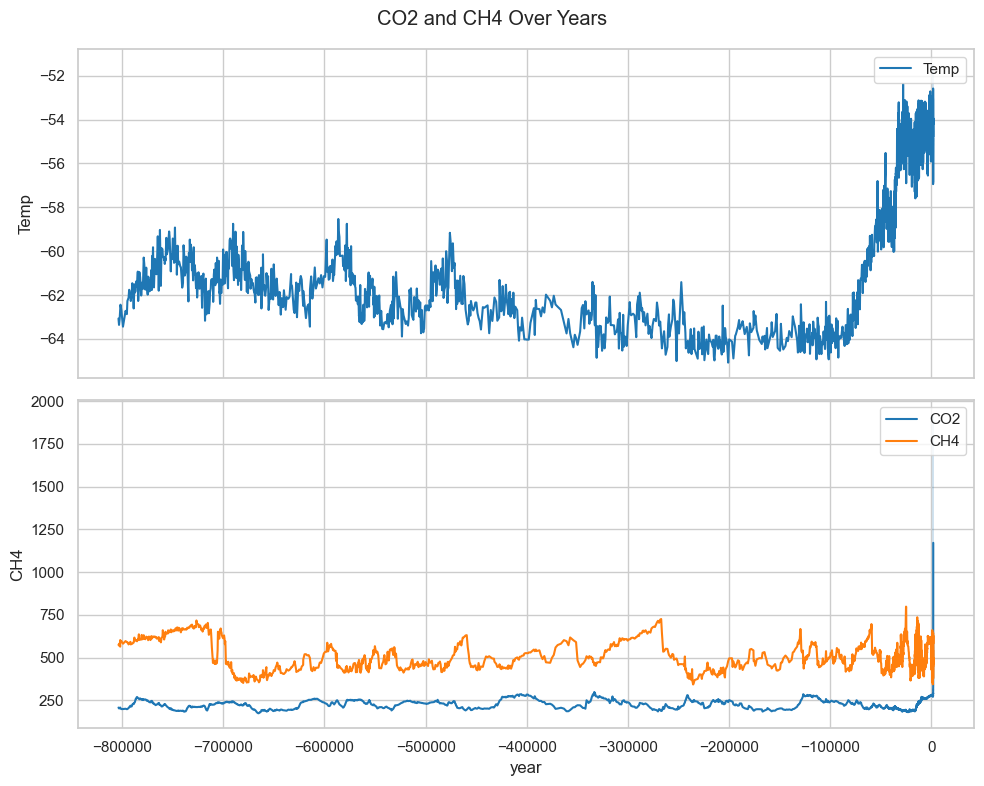

In [123]:
years = mergeddata["year"]
co2values = mergeddata["co2"]
ch4values = mergech4["ch4"]
tempvalues = mergetemp["temp"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.lineplot(x=years, y=tempvalues, ax=ax1, label="Temp")
sns.lineplot(x=years, y=co2values, ax=ax2, label="CO2")
sns.lineplot(x=years, y=ch4values, ax=ax2, label="CH4")

fig.suptitle("CO2 and CH4 Over Years")
ax1.set_xlabel("Year")

ax1.set_ylabel("Temp")
ax2.set_ylabel("CO2")
ax2.set_ylabel("CH4")

ax1.legend()
ax2.legend()

plt.tight_layout()

plt.show()


### CO2 - Plots

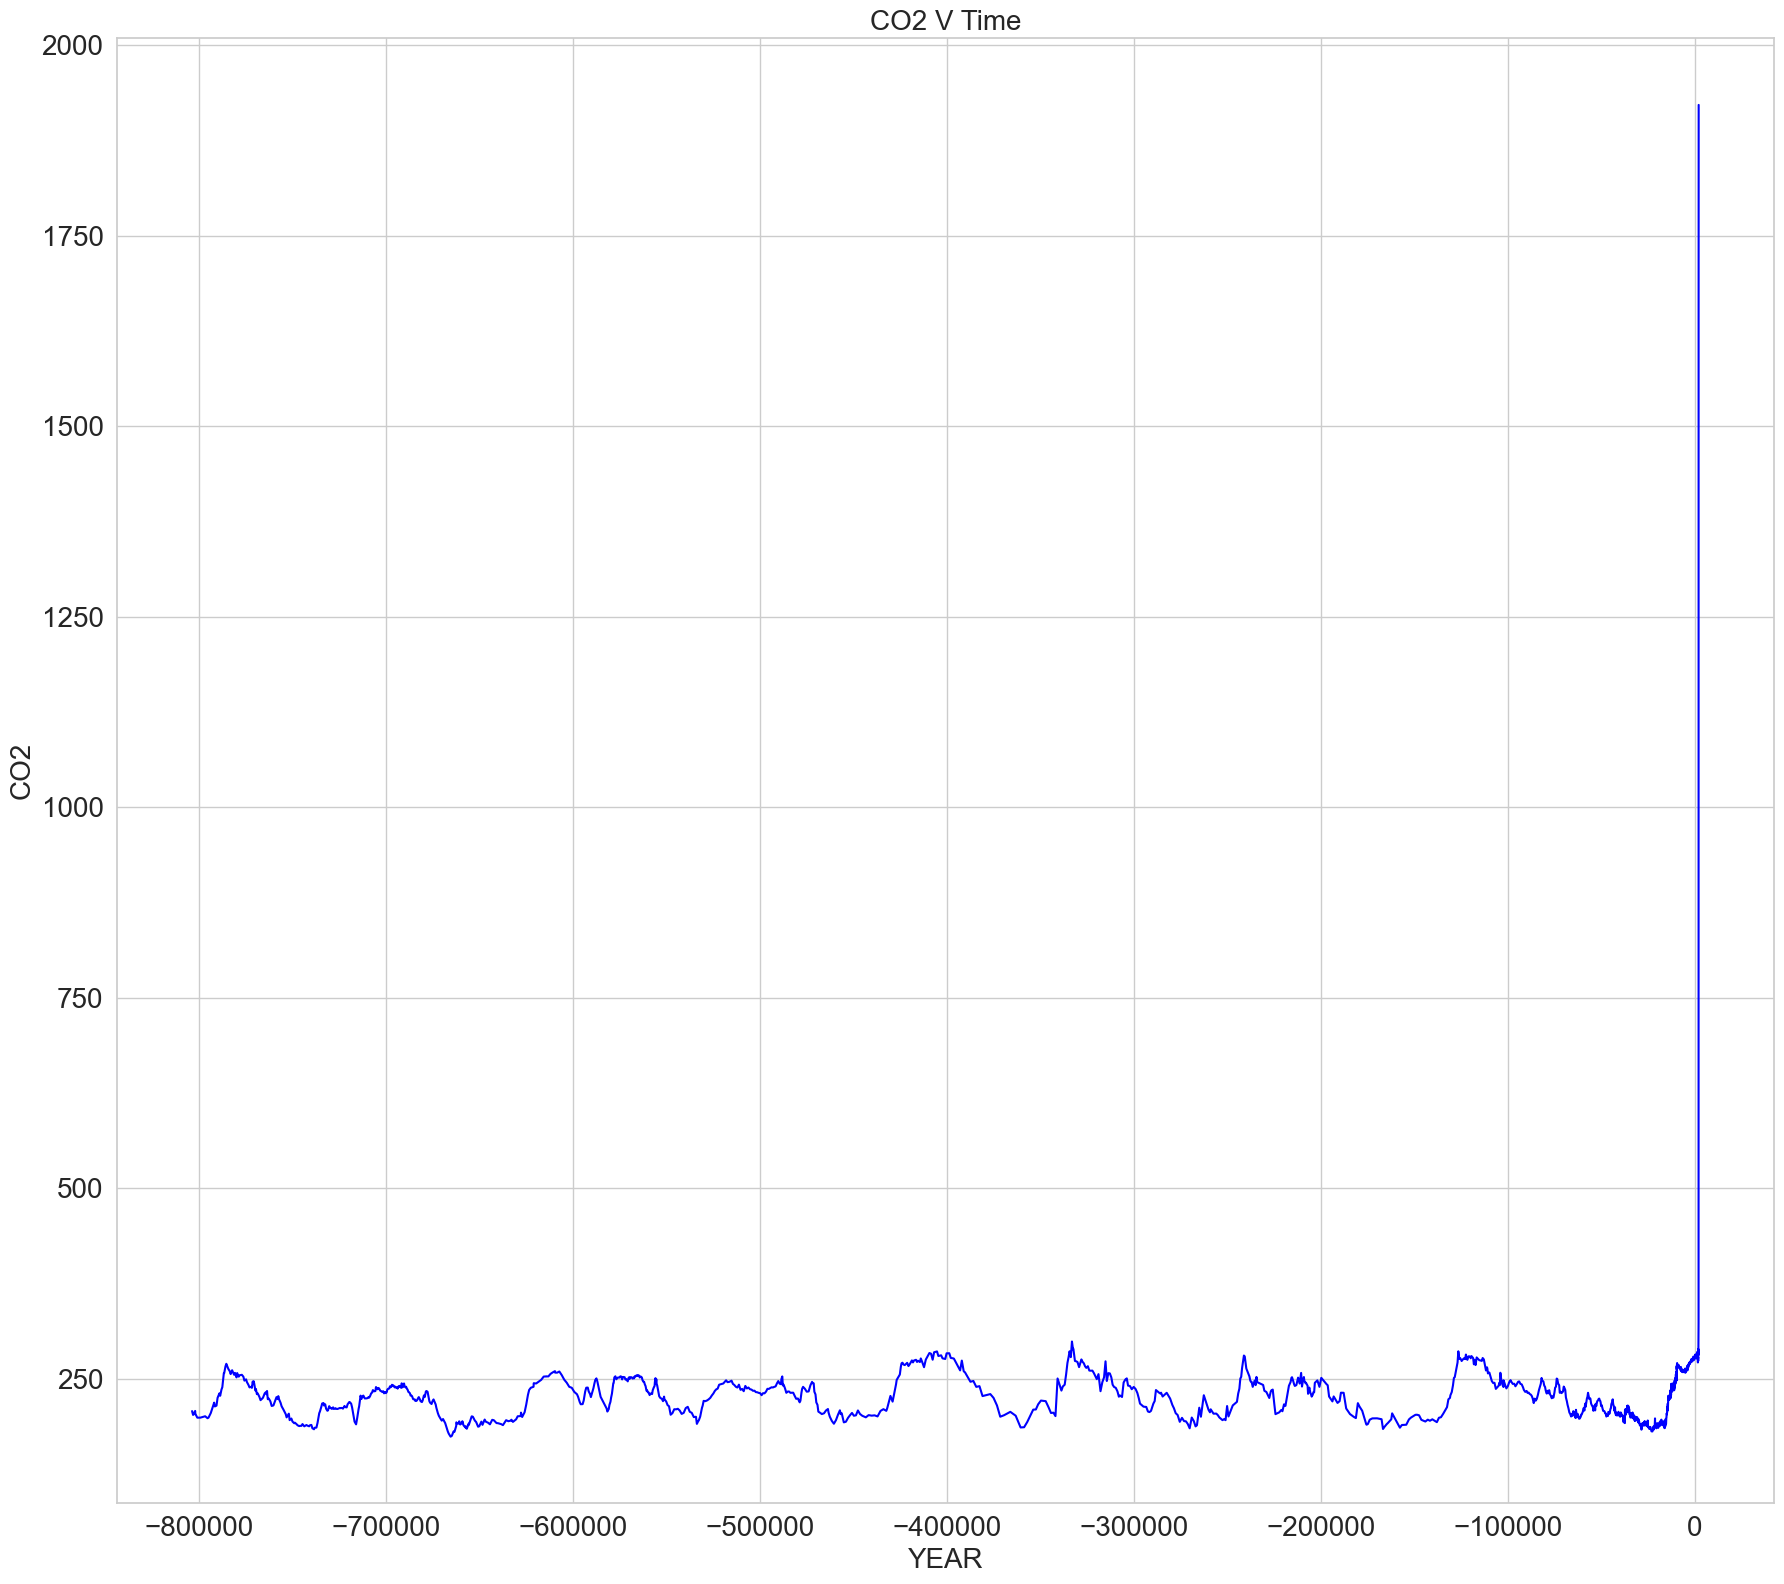

In [124]:
plt.figure(figsize=(18, 16))
plt.plot(mergeddata["year"], mergeddata["co2"], color="blue")
plt.xlabel("YEAR", fontsize=20)
plt.ylabel("CO2", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CO2 V Time", fontsize=20)
plt.tight_layout()
plt.savefig("lineplot1.png")
#### Plot
#SNS Lineplot
#style
sns.set_style("whitegrid")
sns.set_context("paper") 

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

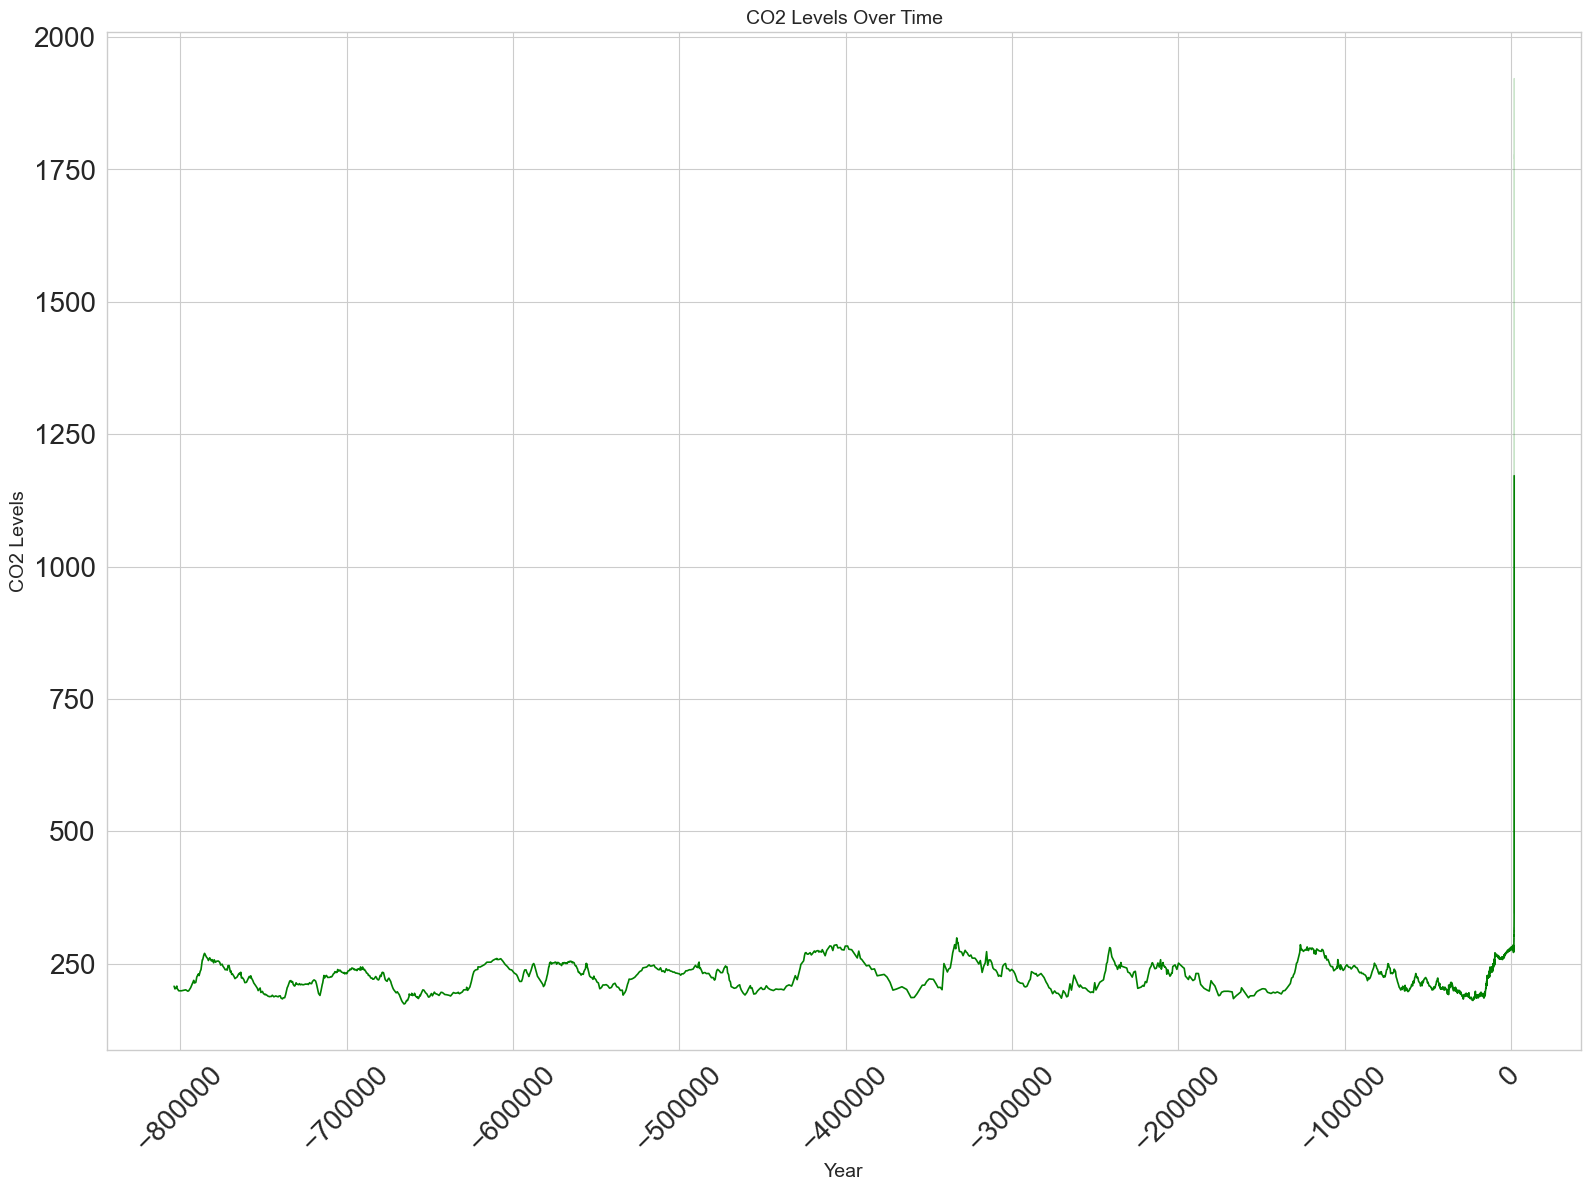

In [125]:
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergeddata, x="year", y="co2", color="green")

#labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Levels", fontsize=14)
plt.title("CO2 Levels Over Time", fontsize=14)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout()  #additional spacing
plt.savefig("snslineplotnew.png")

### CH4 - Plots

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

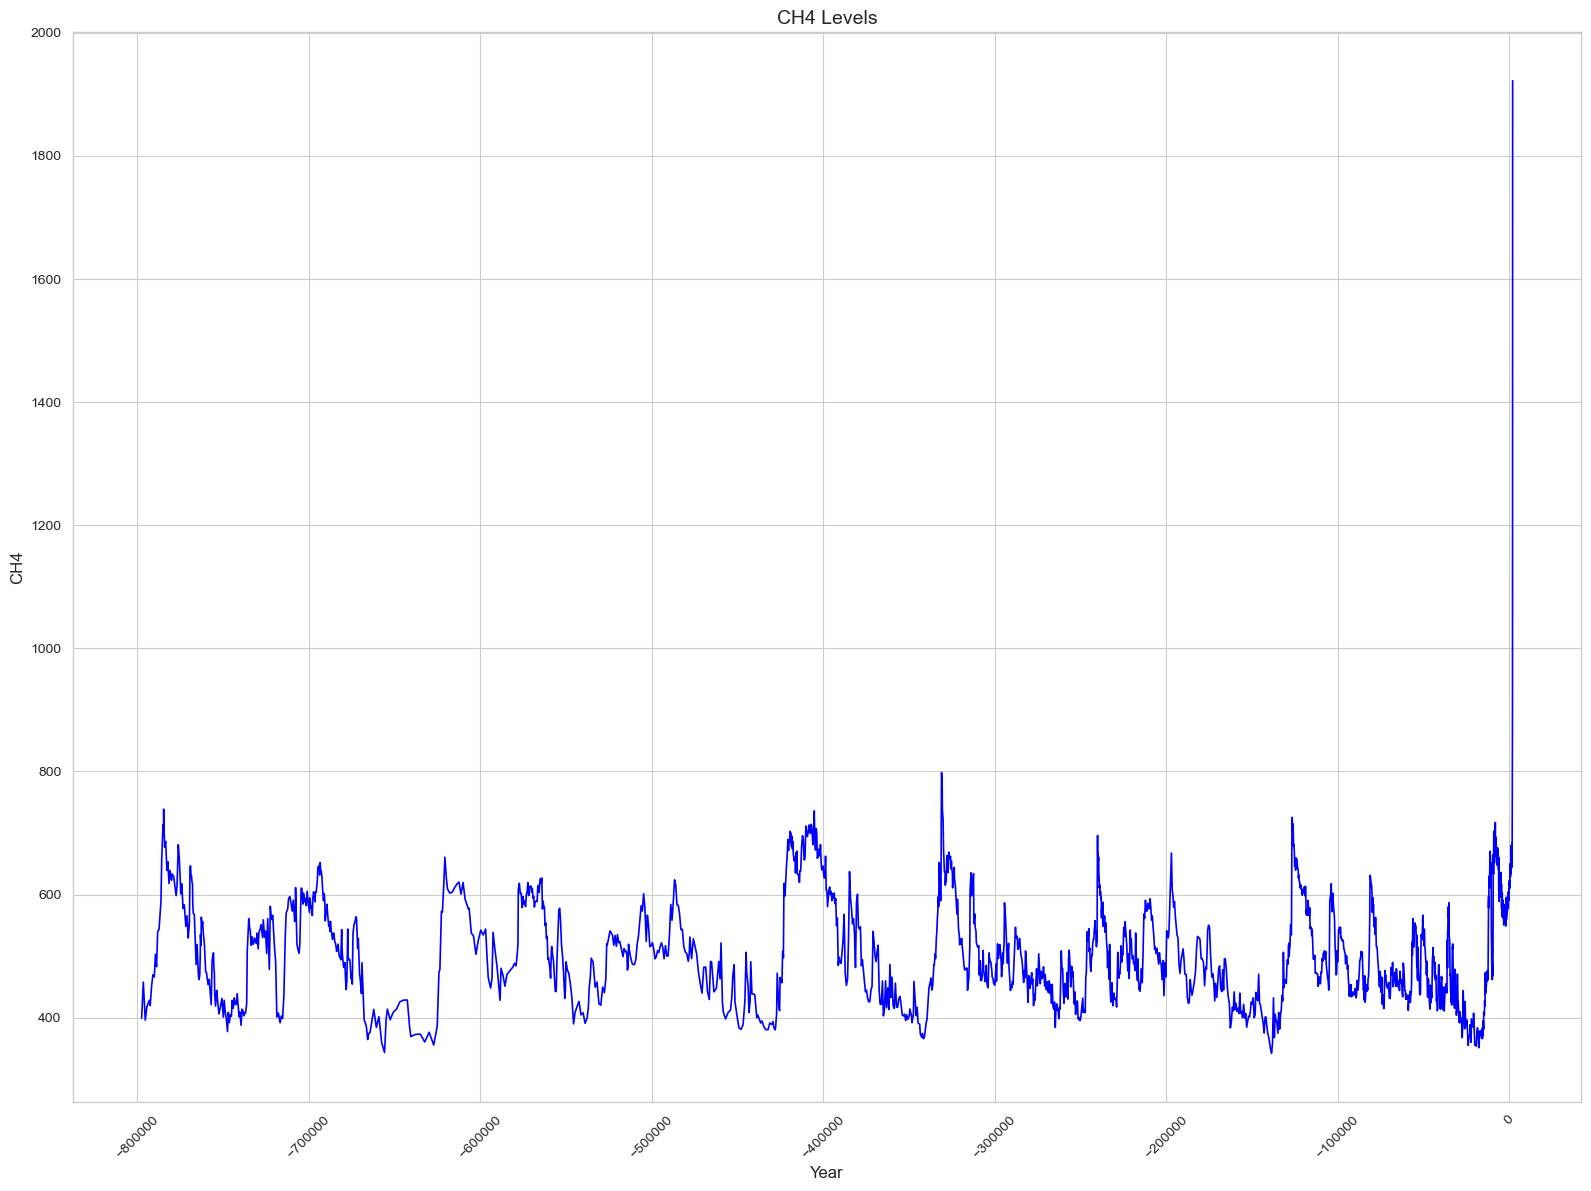

In [126]:
#style
sns.set_style("whitegrid")
sns.set_context("paper")

#size
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

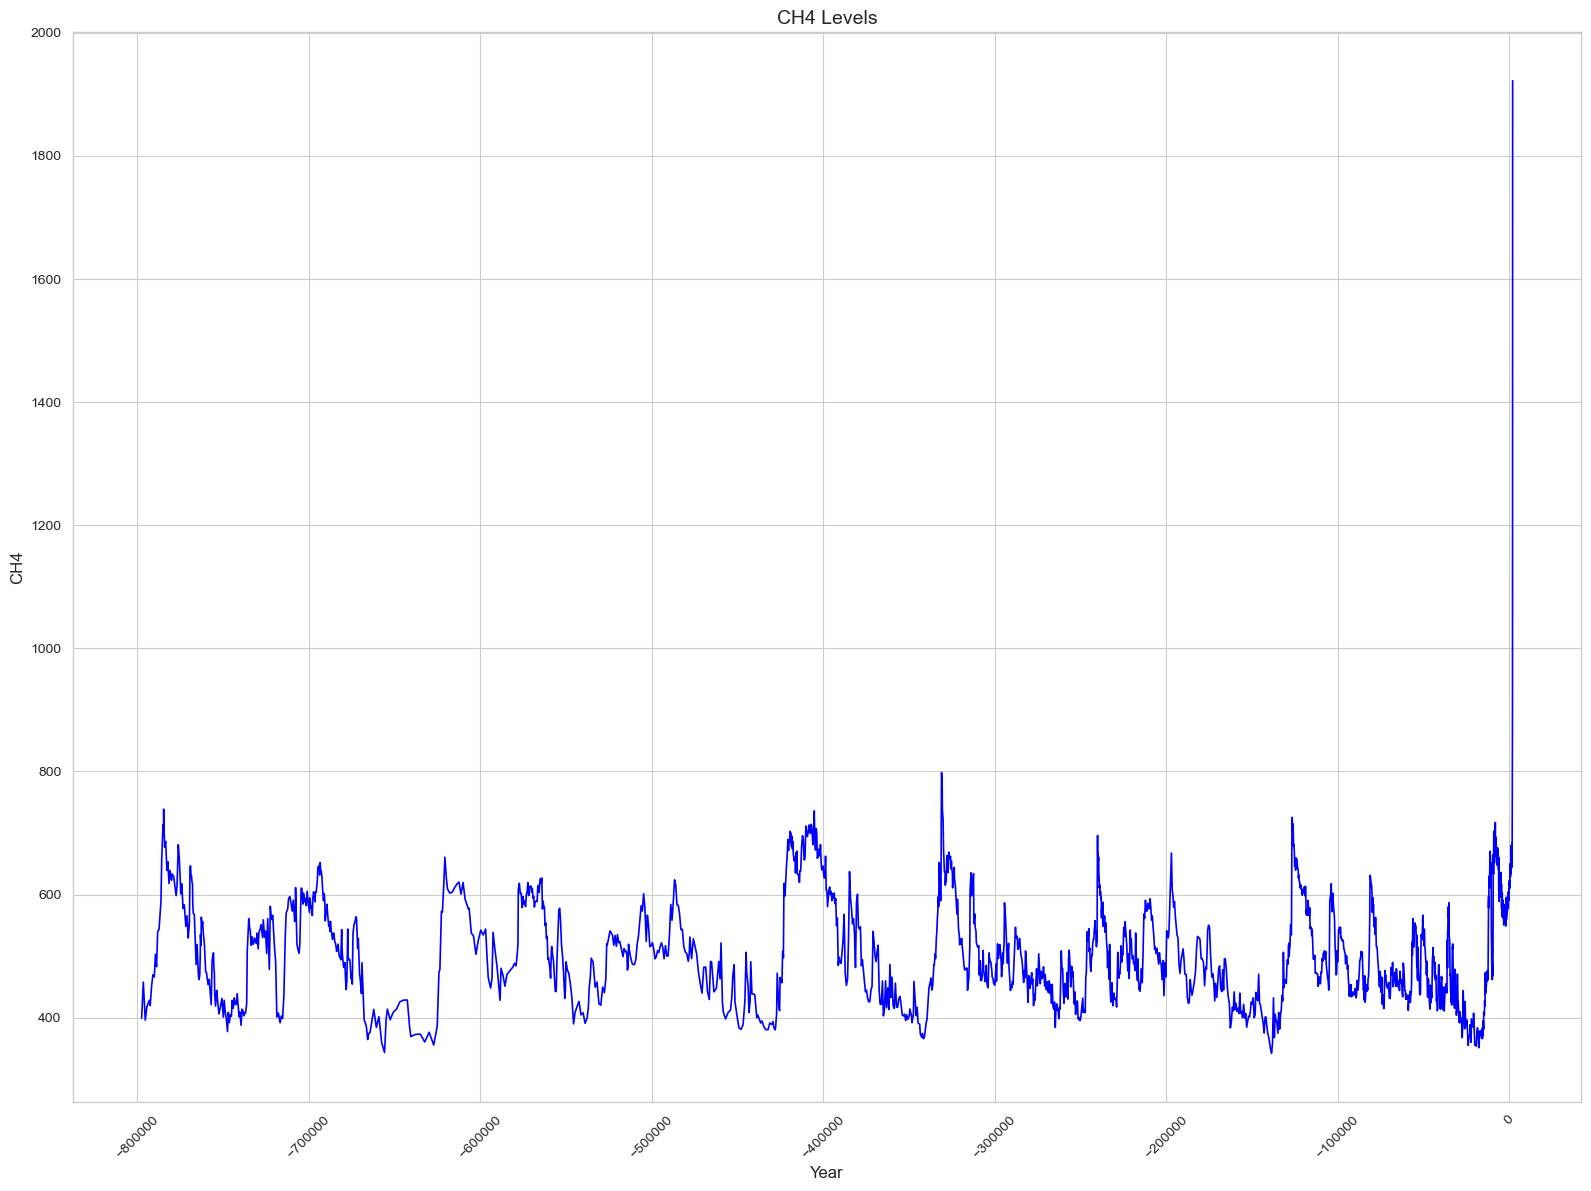

In [127]:
plt.figure(figsize=(16, 12))
#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

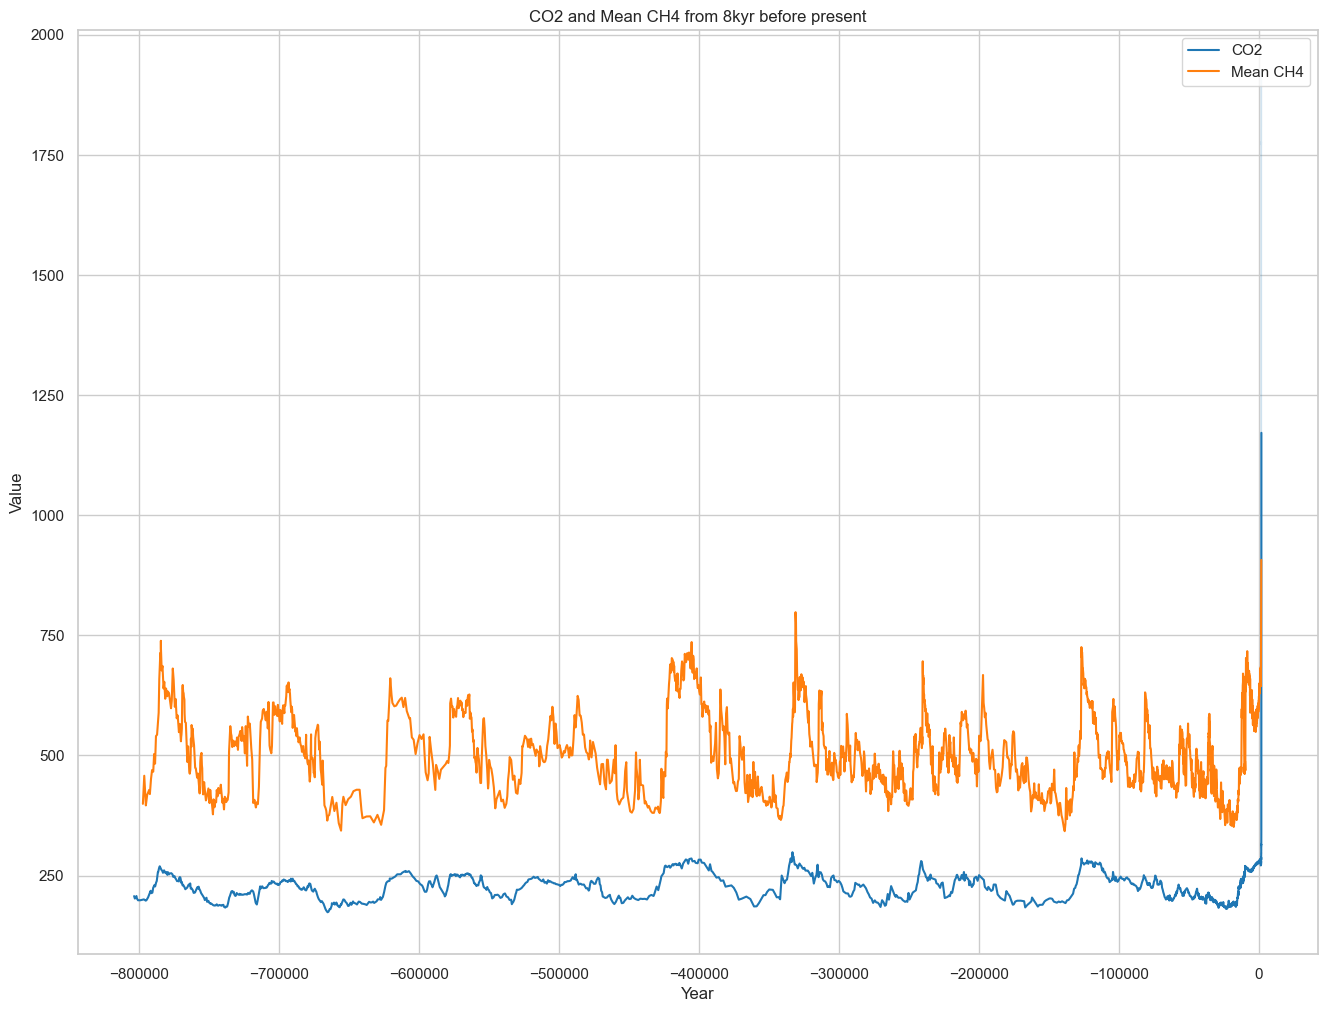

In [128]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")
sns.lineplot(data=ch4data, x="year", y="ch4", label="Mean CH4")

plt.title("CO2 and Mean CH4 from 8kyr before present")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

### Temperature - Plots

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

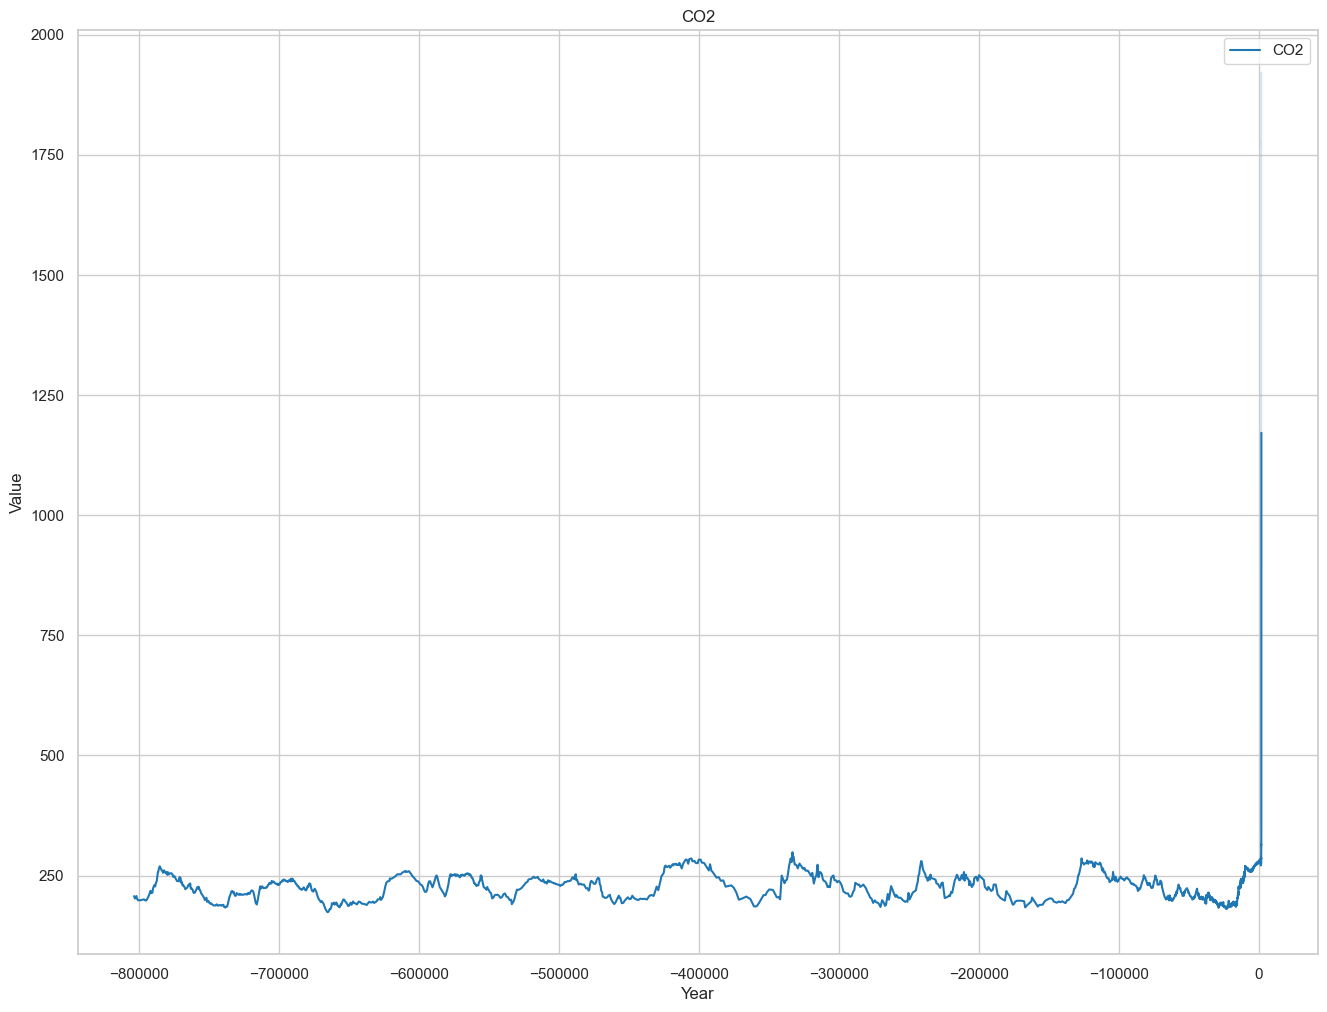

In [129]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")

plt.title("CO2")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

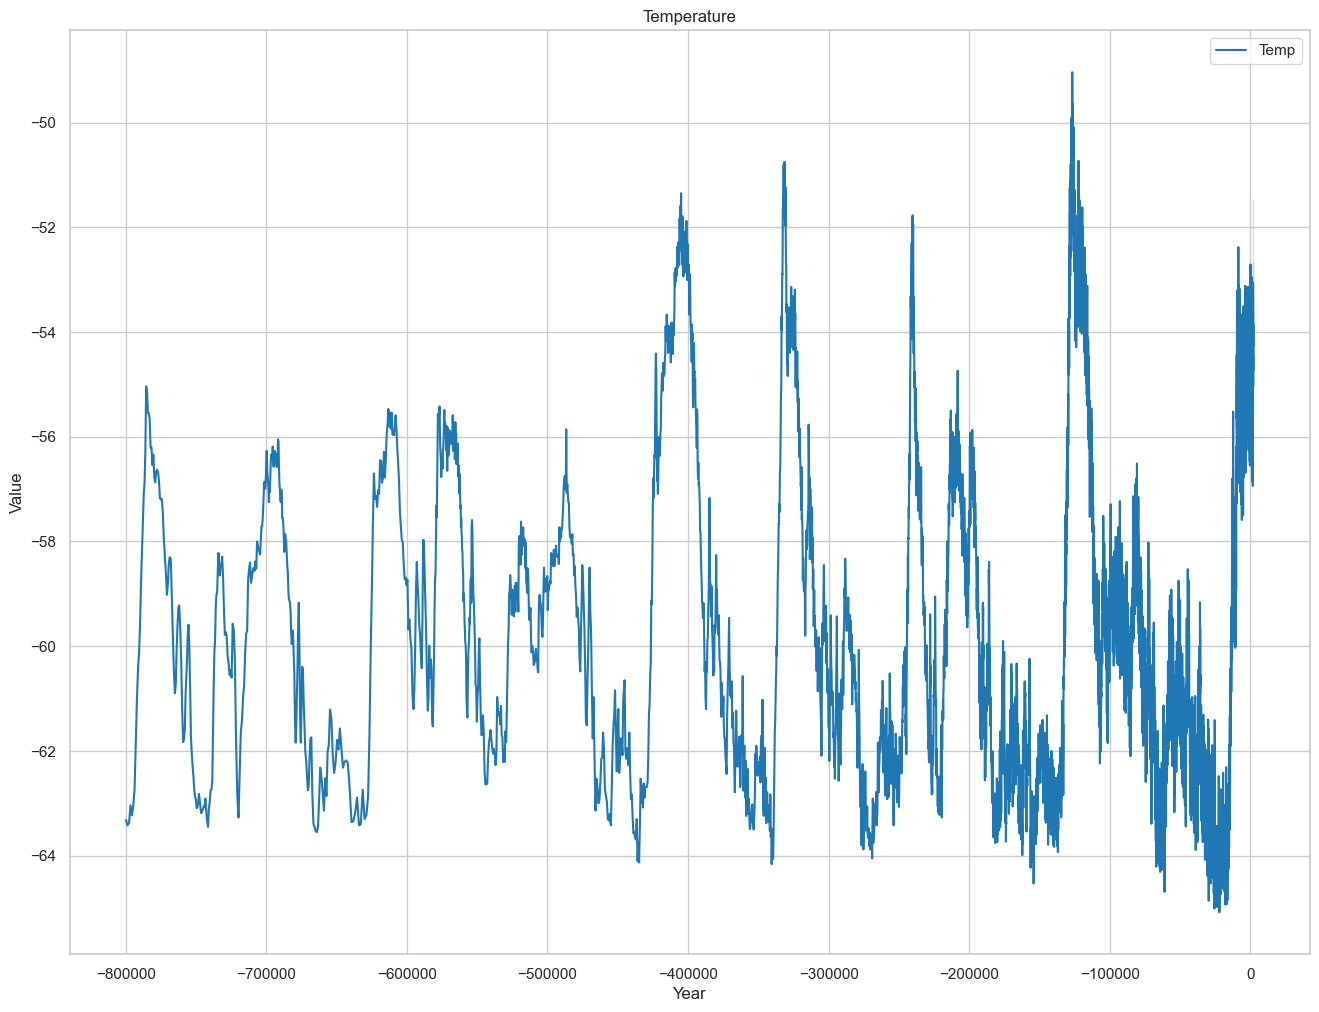

In [130]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergetemp, x="year", y="temp", label="Temp")

plt.title("Temperature")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

### Rainfall - Plots

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

Text(0, 0.5, 'Rainfall (mm)')

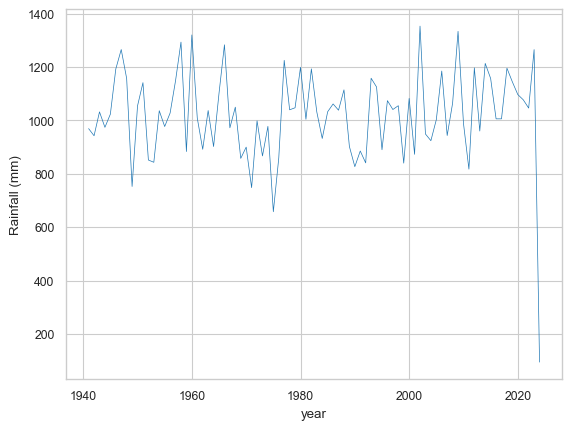

In [131]:
sns.set_context("paper", rc={"lines.linewidth": 0.5, "figure.figsize":(10, 22)})
plot = sns.lineplot(data=raindfread, x="year", y="rain")
plot.set_xlabel("year")
plot.set_ylabel("Rainfall (mm)")

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 1600x1200 with 0 Axes>

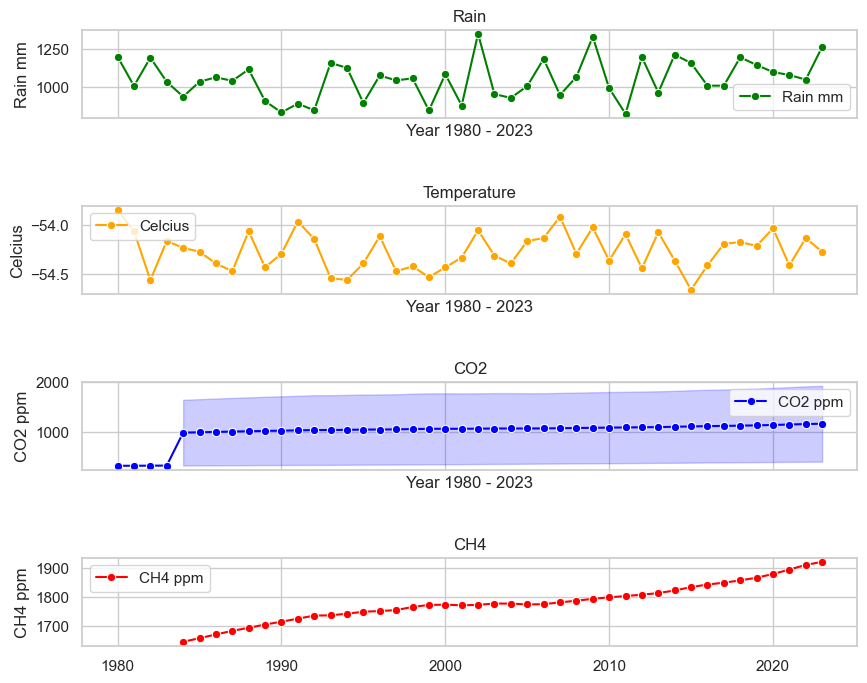

In [132]:
plt.figure(figsize=(16, 12))

sns.set_style("whitegrid")
sns.set_context("notebook")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

raindfreadfiltered = raindfread[(raindfread["year"] >= 1980) & (raindfread["year"] <= 2023)]
mergetempfiltered = mergetemp[(mergetemp["year"] >= 1980) & (mergetemp["year"] <= 2023)]
mergech4filtered = mergech4[(mergech4["year"] >= 1980) & (mergech4["year"] <= 2023)]
mergeco2filtered = mergeddata[(mergeddata["year"] >= 1980) & (mergeddata["year"] <= 2023)]

ax1.set_title("Rain")
ax1.set_xlabel("Year 1980 - 2023")
ax1.set_ylabel("Rain mm")
sns.lineplot(data=raindfreadfiltered, x="year", y="rain", ax=ax1, label="Rain mm", color="green", marker="o")

ax2.set_title("Temperature")
ax2.set_xlabel("Year 1980 - 2023")
ax2.set_ylabel("Celcius")
sns.lineplot(data=mergetempfiltered, x="year", y="temp", ax=ax2, label="Celcius", color="orange", marker="o")

ax3.set_title("CO2")
ax3.set_xlabel("Year 1980 - 2023")
ax3.set_ylabel("CO2 ppm")
sns.lineplot(data=mergeco2filtered, x="year", y="co2", ax=ax3, label="CO2 ppm", color="blue", marker="o")

ax4.set_title("CH4")
ax4.set_xlabel("Year 1980 - 2023")
ax4.set_ylabel("CH4 ppm")
sns.lineplot(data=mergech4filtered, x="year", y="ch4", ax=ax4, label="CH4 ppm", color="red", marker="o")
ax4.set_xlabel("")

plt.subplots_adjust(hspace=1)
plt.legend()

plt.show()

### Trends


### Relationships



---

<a id="03i">

## Predictions

</a>

### Synthetic Data


### Comparisons with Published Climate Models

In [133]:
#SECTION 3 - PYTHON CELL



---

<a id="07i">

## REFERENCES

</a>


---